In [15]:
import pandas as pd # Для работы с данными
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

data = fetch_california_housing()

In [16]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [17]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Пропусков нет

In [18]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Нормализуем признак Population

In [19]:
normalized_Fare = (df['Population'] - df['Population'].min()) / (df['Population'].max() - df['Population'].min())
df['Population'] = normalized_Fare

In [20]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,0.008941,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.067210,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,0.013818,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,0.015555,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,0.015752,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,0.023599,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,0.009894,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,0.028140,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,0.020684,2.123209,39.43,-121.32,0.847


In [21]:
from sklearn.preprocessing import StandardScaler


def get_score(X,y, random_seed=42, model=None):
  if model is None:
      model = LinearRegression()

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed) 

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)


  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [22]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [23]:
columns = [
    'MedInc', 
    'HouseAge', 
    'AveRooms', 
    'AveBedrms', 
    'Population', 
    'AveOccup',
    'Latitude', 
    'Longitude'
]

In [24]:
get_score(df[columns], df['MedHouseVal'])

0.5757877060324511

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
get_score(df[columns], df['MedHouseVal'], model =DecisionTreeRegressor())

0.6260278095058505

In [70]:
get_score(df[columns], df['MedHouseVal'], model =DecisionTreeRegressor(max_depth=9))

0.6889184943581641

In [78]:
get_score(df[columns], df['MedHouseVal'], model =DecisionTreeRegressor(max_depth=10, splitter='random'))

0.5823109274194656

In [42]:
def train_model(X, y, random_seed=42, model=None):
    if model is None:
        model = DecisionTreeRegressor()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed) 

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    return model

In [43]:
model = train_model(df[columns], df['MedHouseVal'])


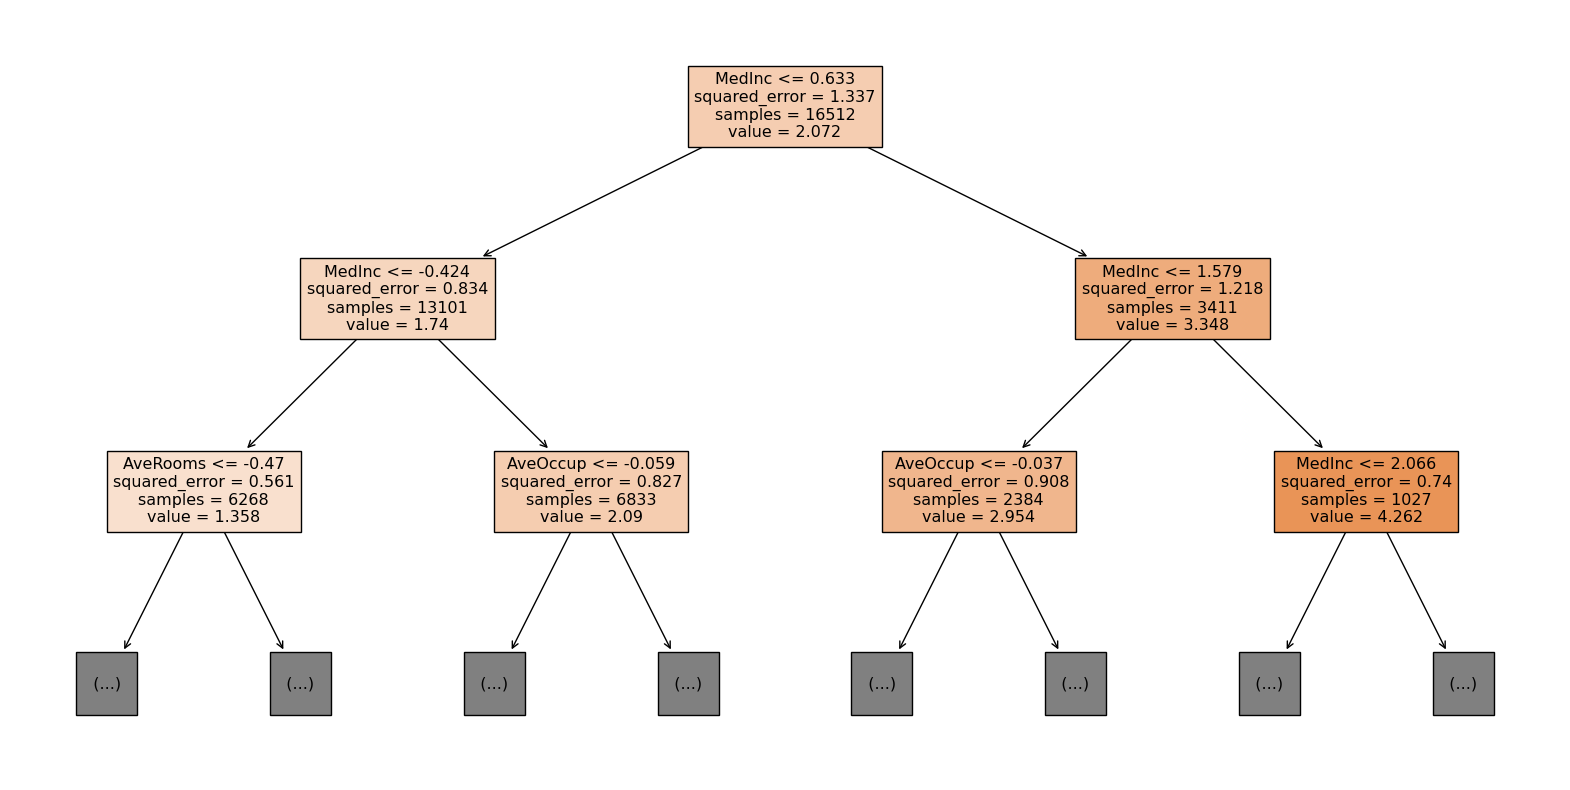

In [46]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  
plot_tree(model, filled=True, max_depth=2, feature_names=columns)
plt.show()

Выводы: 
- Модель ДеревоРешений справилась с задачей на много лучше, чем модель Регрессии.
- Если глубину не ограничивать, модель ухудшается
